In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
df = pd.read_excel('test1.xlsx', sheet_name='Sheet1')

#rename columns


df

,0.5PPM,1.0PPM,1.5PPM,2.0PPM,2.5PPM,3.0PPM,4.0PPM
0,0.340,0.238,0.444,0.508,0.218,0.607,0.378
1,0.337,0.238,0.444,0.510,0.218,0.607,0.378
2,0.335,0.238,0.444,0.510,0.218,0.607,0.378
3,0.337,0.238,0.444,0.510,0.218,0.607,0.378
4,0.337,0.238,0.444,0.510,0.218,0.605,0.378
...,...,...,...,...,...,...,...
4797,0.411,0.890,2.442,0.477,0.645,0.426,0.350
4798,0.409,0.890,2.442,0.477,0.645,0.429,0.350
4799,0.409,0.892,2.442,0.477,0.648,0.426,0.353
4800,0.409,0.892,2.442,0.477,0.648,0.426,0.350


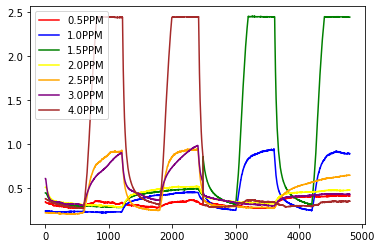

In [27]:
x = np.linspace(0,4801,4802)


plt.plot(x,df['0.5PPM'],label='0.5PPM',color='red')
plt.plot(x,df['1.0PPM'],label='1.0PPM',color='blue')
plt.plot(x,df['1.5PPM'],label='1.5PPM',color='green')
plt.plot(x,df['2.0PPM'],label='2.0PPM',color='yellow')
plt.plot(x,df['2.5PPM'],label='2.5PPM',color='orange')
plt.plot(x,df['3.0PPM'],label='3.0PPM',color='purple')
plt.plot(x,df['4.0PPM'],label='4.0PPM',color='brown')

plt.legend(loc='upper left')

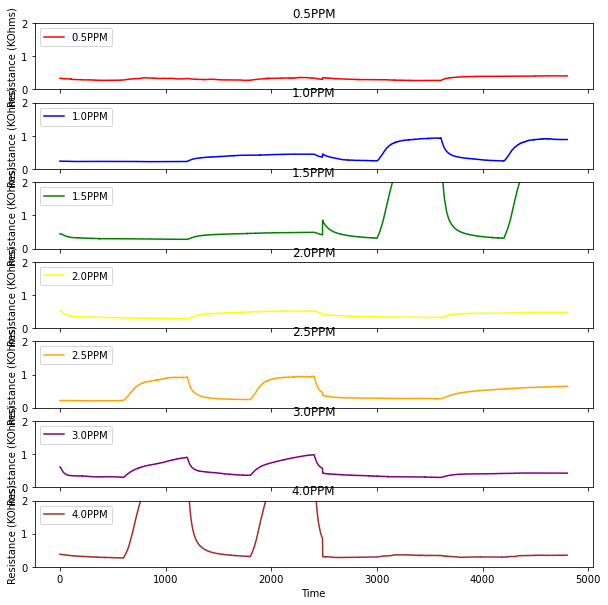

In [28]:
#7 subplots for each ppm

fig, axs = plt.subplots(7, 1, figsize=(10, 10), sharex=True)

axs[0].plot(x,df['0.5PPM'],label='0.5PPM',color='red')
axs[0].legend(loc='upper left')
axs[0].set_title('0.5PPM')

axs[1].plot(x,df['1.0PPM'],label='1.0PPM',color='blue')
axs[1].legend(loc='upper left')
axs[1].set_title('1.0PPM')

axs[2].plot(x,df['1.5PPM'],label='1.5PPM',color='green')
axs[2].legend(loc='upper left')
axs[2].set_title('1.5PPM')

axs[3].plot(x,df['2.0PPM'],label='2.0PPM',color='yellow')
axs[3].legend(loc='upper left')
axs[3].set_title('2.0PPM')

axs[4].plot(x,df['2.5PPM'],label='2.5PPM',color='orange')
axs[4].legend(loc='upper left')
axs[4].set_title('2.5PPM')

axs[5].plot(x,df['3.0PPM'],label='3.0PPM',color='purple')
axs[5].legend(loc='upper left')
axs[5].set_title('3.0PPM')

axs[6].plot(x,df['4.0PPM'],label='4.0PPM',color='brown')
axs[6].legend(loc='upper left')
axs[6].set_title('4.0PPM')

#scale the y axis for each subplot to [0,2]

for ax in axs.flat:
    ax.set(ylabel='Resistance (KOhms)')
    ax.set_ylim([0,2])

plt.xlabel('Time')

plt.show()

In [29]:
#2.5: starts to increase at point 600
#3.0: starts to increase at point 600
#4.0: starts to increase at point 600

#plateaus at 1200 

#take difference between 1100 and 600

difference_sum = []

for i in range(0,7):
    difference_sum.append(df.iloc[1100,i]-df.iloc[600,i])

difference_sum

[0.03300000000000003,
 -0.0050000000000000044,
 -0.01599999999999996,
 -0.020000000000000018,
 0.6930000000000001,
 0.5469999999999999,
 2.174]

In [30]:
#table creator

import pandas as pd

df2 = pd.DataFrame({'PPM': ['0.5','1.0','1.5','2.0','2.5','3.0','4.0'], 'Difference': difference_sum})

df2

,PPM,Difference
0,0.5,0.033
1,1.0,-0.005
2,1.5,-0.016
3,2.0,-0.020
4,2.5,0.693
5,3.0,0.547
6,4.0,2.174


In [33]:
#linear line of best fit from 0 --> 600

#take first 600 points of df

df3 = df.iloc[0:600,:]

df3


#linear best fit line for each

from scipy import stats

slope_list = []
intercept_list = []
r_value_list = []
p_value_list = []

for i in range(0,7):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df3.index,df3.iloc[:,i])
    slope_list.append(slope)
    intercept_list.append(intercept)
    r_value_list.append(r_value)
    p_value_list.append(p_value)

#make a table of ppm, slope, intercept, r_value, p_value

df4 = pd.DataFrame({'PPM': ['0.5','1.0','1.5','2.0','2.5','3.0','4.0'], 'Slope': slope_list, 'Intercept': intercept_list, 'R Value': r_value_list, 'P Value': p_value_list})

df4



,PPM,Slope,Intercept,R Value,P Value
0,0.5,-8.908153e-05,0.319117,-0.876730,3.046822e-192
1,1.0,1.911950e-07,0.231084,0.011066,7.867658e-01
2,1.5,-1.658184e-04,0.371441,-0.803765,5.567587e-137
3,2.0,-2.078072e-04,0.409708,-0.791020,1.006893e-129
4,2.5,-1.116573e-05,0.214139,-0.424665,1.144404e-27
5,3.0,-2.172366e-04,0.406857,-0.688537,1.694204e-85
6,4.0,-1.678967e-04,0.355867,-0.970080,0.000000e+00


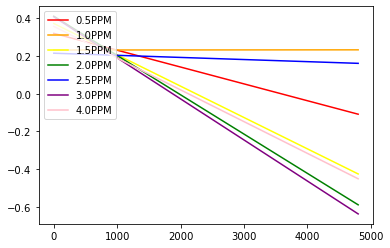

In [36]:
#plot linear best fit line for each
#put the linear best fit line on the original plot

plt.plot(x,df4.iloc[0,1]*x+df4.iloc[0,2],label='0.5PPM',color='red')
plt.plot(x,df4.iloc[1,1]*x+df4.iloc[1,2],label='1.0PPM',color = 'orange')
plt.plot(x,df4.iloc[2,1]*x+df4.iloc[2,2],label='1.5PPM',color='yellow')
plt.plot(x,df4.iloc[3,1]*x+df4.iloc[3,2],label='2.0PPM',color='green')
plt.plot(x,df4.iloc[4,1]*x+df4.iloc[4,2],label='2.5PPM',color='blue')
plt.plot(x,df4.iloc[5,1]*x+df4.iloc[5,2],label='3.0PPM',color='purple')
plt.plot(x,df4.iloc[6,1]*x+df4.iloc[6,2],label='4.0PPM',color='pink')

plt.legend(loc='upper left')

plt.show()

